## Inflation, HPI, and Unemployment Project

In [160]:
import pandas as pd
pd.options.mode.copy_on_write = True 

file_1 = "/workspaces/Projects/Housing Price Index 2000-2023.csv"
hpi = pd.read_csv(file_1)

file_2 = "/workspaces/Projects/Unemployment 2000-2023 csv.csv"
Unemp = pd.read_csv(file_2)

file_3 = "/workspaces/Projects/united-states-inflation-rate-cpi.csv"
infl = pd.read_csv(file_3)

### Cleaning File 1: _Housing Price Index_
##### - To start, unnecessary columns will be dropped. Columns will also be renamed when needed/desired.
##### - Next, the removal of the string found in _State_ to ease the merging process.
##### - Lastly, divide the _Unit_ column by "Percentage" and "Index" values.

In [161]:
hpi

,TL,Territory Level and Typology,REG_ID,Region,VAR,Variable,VINTAGE,Vintage,DWELLINGS,Dwellings,...,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,1,Country,USA,United States,RHPI,House Price Index,VINTAGE_EXISTING,Existing,DWELLINGS_SINGLE_F,Single-Family,...,2000,IDX,Index,0,Units,2015_100,2015=100,66.128,NaN,NaN
1,1,Country,USA,United States,RHPI,House Price Index,VINTAGE_EXISTING,Existing,DWELLINGS_SINGLE_F,Single-Family,...,2001,IDX,Index,0,Units,2015_100,2015=100,71.074,NaN,NaN
2,1,Country,USA,United States,RHPI,House Price Index,VINTAGE_EXISTING,Existing,DWELLINGS_SINGLE_F,Single-Family,...,2002,IDX,Index,0,Units,2015_100,2015=100,75.575,NaN,NaN
3,1,Country,USA,United States,RHPI,House Price Index,VINTAGE_EXISTING,Existing,DWELLINGS_SINGLE_F,Single-Family,...,2003,IDX,Index,0,Units,2015_100,2015=100,80.287,NaN,NaN
4,1,Country,USA,United States,RHPI,House Price Index,VINTAGE_EXISTING,Existing,DWELLINGS_SINGLE_F,Single-Family,...,2004,IDX,Index,0,Units,2015_100,2015=100,87.813,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,2,Large regions,US56,Wyoming (USA),RHPI,House Price Index,VINTAGE_EXISTING,Existing,DWELLINGS_SINGLE_F,Single-Family,...,2018,PC,Percentage,0,Units,NaN,NaN,3.543,NaN,NaN
3515,2,Large regions,US56,Wyoming (USA),RHPI,House Price Index,VINTAGE_EXISTING,Existing,DWELLINGS_SINGLE_F,Single-Family,...,2019,PC,Percentage,0,Units,NaN,NaN,4.211,NaN,NaN
3516,2,Large regions,US56,Wyoming (USA),RHPI,House Price Index,VINTAGE_EXISTING,Existing,DWELLINGS_SINGLE_F,Single-Family,...,2020,PC,Percentage,0,Units,NaN,NaN,5.053,NaN,NaN
3517,2,Large regions,US56,Wyoming (USA),RHPI,House Price Index,VINTAGE_EXISTING,Existing,DWELLINGS_SINGLE_F,Single-Family,...,2021,PC,Percentage,0,Units,NaN,NaN,11.620,NaN,NaN


In [162]:
hpi.drop(['FREQ', 'Frequency', 'TIME', 'Unit Code',
          'PowerCode Code', 'PowerCode', 'Reference Period Code',
          'Flag Codes', 'Flags'], axis = 1, inplace=True)

# Removing 'Country' Value, as we are focusing on States
hpi_new = hpi[hpi['Territory Level and Typology'] != 'Country']
hpi_new.drop(['TL', 'Territory Level and Typology', 'REG_ID', 'VINTAGE', 
              'DWELLINGS', 'Reference Period', 'Variable'], axis = 1, inplace = True)

hpi_new.rename(columns={'Value': 'HPI', 'Region':'State', 'Time':'Year'}, inplace=True)

# Removing string to ease file merging
hpi_new['State'] = hpi_new['State'].apply(lambda x: x.split('(USA)')[0].strip())

In [163]:
## Seperate Percentage and Index, found in the Unit column
# Create and merge new dataset w/ original

filtered_percent = hpi_new[hpi_new['Unit'].isin(['Percentage'])]
fp_new = filtered_percent[filtered_percent['MEASURE'] != 'GP']
filtered_index = hpi_new[hpi_new['Unit'].isin(['Index'])]

HPI_Final = pd.merge(fp_new, filtered_index, on=['State', 'Year'])
HPI_Final.drop(['VAR_y', 'Vintage_y', 'Dwellings_y', 'MEASURE_y', 
                 'MEASURE_x', 'VAR_x', 'Measure_y', 'Unit_y', 'Unit_x', 
                 'Measure_x'], axis = 1, inplace = True)
HPI_Final.rename(columns={'Vintage_x':'Vintage', 'Dwellings_x':'Dwellings', 
                           'HPI_x':'HPI Yearly Percent Change',
                           'HPI_y':'HPI Index Publication Base'}, inplace=True)

HPI_Final


,State,Vintage,Dwellings,Year,HPI Yearly Percent Change,HPI Index Publication Base
0,Alabama,Existing,Single-Family,2000,2.509,74.117
1,Alabama,Existing,Single-Family,2001,5.516,78.206
2,Alabama,Existing,Single-Family,2002,2.932,80.499
3,Alabama,Existing,Single-Family,2003,3.980,83.702
4,Alabama,Existing,Single-Family,2004,3.807,86.888
...,...,...,...,...,...,...
1145,Wyoming,Existing,Single-Family,2018,3.543,107.128
1146,Wyoming,Existing,Single-Family,2019,4.211,111.639
1147,Wyoming,Existing,Single-Family,2020,5.053,117.280
1148,Wyoming,Existing,Single-Family,2021,11.620,130.908


### Cleaning File 2: _Unemployment_
##### - Firstly, row 2 will replace the file's current column headers, which are null values.
##### - Then, similar to File_1, unnecessary columns will be dropped. Columns will also be renamed when needed/desired.
##### - Next, state names will be added in association to their values.
##### - Additionally, rows will receive new labels to be filtered and merged.
##### - Lastly, the last 49 rows will be dropped for having null values.

In [164]:
Unemp

,Local Area Unemployment Statistics,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Years:,2000 to 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Series ID,Annual\n2000,Annual\n2001,Annual\n2002,Annual\n2003,Annual\n2004,Annual\n2005,Annual\n2006,Annual\n2007,Annual\n2008,...,Annual\n2014,Annual\n2015,Annual\n2016,Annual\n2017,Annual\n2018,Annual\n2019,Annual\n2020,Annual\n2021,Annual\n2022,Annual\n2023
3,LAUST010000000000003,4.6,5.2,5.9,6.0,5.6,4.4,4.0,4.1,5.8,...,6.7,6.1,5.9,4.5,3.9,3.2,6.4,3.4,2.6,NaN
4,LAUST010000000000004,99442,110560,124988,127100,119523,95122,86800,88418,127275,...,146010,131852,126572,99585,87839,72498,145263,76019,59358,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,LAUST560000000000005,255726,258172,258571,260995,264187,269172,276310,283072,287909,...,289694,288894,284439,281164,280754,282433,276495,275748,281343,NaN
349,LAUST560000000000006,265701,268393,269405,272804,274736,279083,284826,290748,296620,...,302865,301608,300546,293802,292629,293320,293755,289154,291756,NaN
350,LAUST560000000000007,68.6,68.8,68.2,68.2,68.4,69.0,69.8,70.1,70.1,...,64.4,64.0,63.1,63.1,63.0,63.1,61.4,60.7,61.4,NaN
351,LAUST560000000000008,71.3,71.6,71.0,71.3,71.1,71.6,71.9,72.0,72.2,...,67.3,66.8,66.6,65.9,65.7,65.6,65.2,63.7,63.7,NaN


In [165]:
## Remove the first two rows to create new headers
# The new header values will become our 'Year' values

new_headers = Unemp.iloc[2].str.replace('\n', ' ')
Unemp = Unemp.iloc[3:]
Unemp.columns = new_headers

Unemp.drop(['Annual 2023'], axis=1, inplace = True)
removal = "Annual"
Unemp.columns = Unemp.columns.str.replace(removal, "")

## Because the data was shifted up, a new file was made to ensure that the changes were kept in future cells
Unemp.to_csv("/workspaces/Projects/Altered csv Files/New Unemployment.csv", index=False)
new_file_2 = "/workspaces/Projects/Altered csv Files/New Unemployment.csv"
New_Unemp = pd.read_csv(new_file_2)

New_Unemp

,Series ID,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,LAUST010000000000003,4.6,5.2,5.9,6.0,5.6,4.4,4.0,4.1,5.8,...,7.3,6.7,6.1,5.9,4.5,3.9,3.2,6.4,3.4,2.6
1,LAUST010000000000004,99442.0,110560.0,124988.0,127100.0,119523.0,95122.0,86800.0,88418.0,127275.0,...,159274.0,146010.0,131852.0,126572.0,99585.0,87839.0,72498.0,145263.0,76019.0,59358.0
2,LAUST010000000000005,2047731.0,2017467.0,1987633.0,2001568.0,2018783.0,2045234.0,2083207.0,2092030.0,2049579.0,...,2012828.0,2018705.0,2020443.0,2029157.0,2103873.0,2152270.0,2200437.0,2124409.0,2183330.0,2226670.0
3,LAUST010000000000006,2147173.0,2128027.0,2112621.0,2128668.0,2138306.0,2140356.0,2170007.0,2180448.0,2176854.0,...,2172102.0,2164715.0,2152295.0,2155729.0,2203458.0,2240109.0,2272935.0,2269672.0,2259349.0,2286028.0
4,LAUST010000000000007,60.6,59.5,58.4,58.5,58.6,58.8,59.1,58.8,57.1,...,53.4,53.4,53.2,53.2,54.1,55.0,55.9,53.6,54.7,55.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,LAUST560000000000005,255726.0,258172.0,258571.0,260995.0,264187.0,269172.0,276310.0,283072.0,287909.0,...,287792.0,289694.0,288894.0,284439.0,281164.0,280754.0,282433.0,276495.0,275748.0,281343.0
346,LAUST560000000000006,265701.0,268393.0,269405.0,272804.0,274736.0,279083.0,284826.0,290748.0,296620.0,...,302201.0,302865.0,301608.0,300546.0,293802.0,292629.0,293320.0,293755.0,289154.0,291756.0
347,LAUST560000000000007,68.6,68.8,68.2,68.2,68.4,69.0,69.8,70.1,70.1,...,64.2,64.4,64.0,63.1,63.1,63.0,63.1,61.4,60.7,61.4
348,LAUST560000000000008,71.3,71.6,71.0,71.3,71.1,71.6,71.9,72.0,72.2,...,67.4,67.3,66.8,66.6,65.9,65.7,65.6,65.2,63.7,63.7


In [166]:
## Why does each state need to be added 7 times?
# When downloading data from the Bureau of Labor Statistics, you will find an option that allows for each data file to be merged into one.
    # Otherwise, you will have to download 50 separate data files.
# Merged or otherwise, state names are excluded. This means that for file_2, all rows are 'ambigious'.
# Luckily, each state's data was merged alphabetically, with exactly 7 rows of data for each state.
# This makes for an easy solution: Add each state 7 times, in alphabetical order.


states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", 
          "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", 
          "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", 
          "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", 
          "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", 
          "New Hampshire", "New Jersey", "New Mexico", "New York", 
          "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", 
          "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", 
          "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
          "West Virginia", "Wisconsin", "Wyoming"]

repeated_states = [st for st in states for _ in range(7)]
state = pd.DataFrame({"State": repeated_states})
state.reset_index(drop=True, inplace=True)
New_Unemp_States = pd.concat([New_Unemp, state], axis=1)

In [167]:
## File_2 featured a second problem: Unlabled data values
# For the sake of analysis, each value should be associated with an identifier.
# As stated before, each state features 7 rows of data.
    # With each row corresponding to a type of stat (EX: 'Unemplopyment Rate').
# As such, all that is needed is to add each stat name in order of appearance, and then have them repeated across the entire file.

column_names = ['Unemployment Rate', 'Unemployment', 'Employment', 'Labor Force',
                'Employment-Population Ratio', 'Labor Force Participation Rate',
                'Civilian Noninstitutional Population']

num_reps = len(New_Unemp_States) // len(column_names) + 1
repeated_values = (column_names * num_reps)[:len(New_Unemp_States)]
New_Unemp_States['New_Column'] = repeated_values

In [168]:
## Next, we will filter, melt, and merge each row by their new labels.
# That way, each label with become our new column headers.

labels_to_filter = ['Unemployment Rate', 'Unemployment', 'Employment', 
                    'Labor Force', 'Employment-Population Ratio', 
                    'Labor Force Participation Rate', ]

filtered = New_Unemp_States[New_Unemp_States['New_Column'].isin(labels_to_filter)]
filtered.drop(['Series ID'], axis = 1, inplace = True)

melted_dfs = []

for value in labels_to_filter:
    melted_df = pd.melt(filtered[filtered['New_Column'] == value], 
                        id_vars=['State'], var_name='Year', value_name=value)
    melted_dfs.append(melted_df)

melted_df_combined = melted_dfs[0]
for melted_df in melted_dfs[1:]:
    melted_df_combined = pd.merge(melted_df_combined, melted_df, 
                                  on=['State', 'Year'], how='outer')


## Drop the last 49 rows for null values and rename file for clarity
    
Unemployment_Final = melted_df_combined.iloc[:-50]
Unemployment_Final['Year'] = Unemployment_Final['Year'].astype(int)
Unemployment_Final

,State,Year,Unemployment Rate,Unemployment,Employment,Labor Force,Employment-Population Ratio,Labor Force Participation Rate
0,Alabama,2000,4.6,99442.0,2047731.0,2147173.0,60.6,63.6
1,Alaska,2000,6.3,20187.0,299590.0,319777.0,68.7,73.3
2,Arizona,2000,4.0,99786.0,2410825.0,2510611.0,62.6,65.2
3,Arkansas,2000,4.2,52674.0,1207833.0,1260507.0,59.6,62.2
4,California,2000,4.9,825917.0,16011619.0,16837536.0,63.8,67.0
...,...,...,...,...,...,...,...,...
1145,Virginia,2022,2.9,127053.0,4308805.0,4435858.0,63.0,64.9
1146,Washington,2022,4.2,168024.0,3822319.0,3990343.0,61.4,64.1
1147,West Virginia,2022,3.9,30662.0,754453.0,785115.0,52.5,54.7
1148,Wisconsin,2022,2.9,90079.0,2992049.0,3082128.0,63.1,65.0


### Cleaning File 3: _Inflation_
##### - Start by dropping unnecessary columns. Columns will also be renamed when needed/desired.
##### - Next, the removal of the first 40 rows for including data before the 2000's.
##### - Then, alter the _date_ column in preparation for merging.

In [169]:
infl.drop(['Unnamed: 3'], axis = 1, inplace = True)
Infl_Final = infl.iloc[40:]

# Rename Date, remove strs. other than 'Year' value
Infl_Final.rename(columns={'date':'Year', ' Annual Change':'Annual Change', ' Inflation Rate (%)':'Inflation Rate (%)'}, inplace=True)
Infl_Final['Year'] = Infl_Final['Year'].str.replace('12/31/', '')

# Year needs to be int
Infl_Final['Year'] = Infl_Final['Year'].astype(int)

Infl_Final

,Year,Inflation Rate (%),Annual Change
40,2000,3.3769,1.19
41,2001,2.8262,-0.55
42,2002,1.5860,-1.24
43,2003,2.2701,0.68
44,2004,2.6772,0.41
45,2005,3.3927,0.72
46,2006,3.2259,-0.17
47,2007,2.8527,-0.37
48,2008,3.8391,0.99
49,2009,-0.3555,-4.19


### Finally, we merge all 3 files!
##### - Note that the final file should include 1150 rows and 14 columns

In [170]:
# File 1 and 2 on STATE AND YEAR
first_merge = HPI_Final.merge(Unemployment_Final, on=['State', 'Year'])

# File ^ and File 3 on YEAR
Final_Project_File = first_merge.merge(Infl_Final, on = ['Year'])
Final_Project_File.to_csv("/workspaces/Projects/Final Project File.csv", index=False)

Final_Project_File

,State,Vintage,Dwellings,Year,HPI Yearly Percent Change,HPI Index Publication Base,Unemployment Rate,Unemployment,Employment,Labor Force,Employment-Population Ratio,Labor Force Participation Rate,Inflation Rate (%),Annual Change
0,Alabama,Existing,Single-Family,2000,2.509,74.117,4.6,99442.0,2047731.0,2147173.0,60.6,63.6,3.3769,1.19
1,Alaska,Existing,Single-Family,2000,1.724,56.367,6.3,20187.0,299590.0,319777.0,68.7,73.3,3.3769,1.19
2,Arizona,Existing,Single-Family,2000,6.005,63.434,4.0,99786.0,2410825.0,2510611.0,62.6,65.2,3.3769,1.19
3,Arkansas,Existing,Single-Family,2000,2.349,71.206,4.2,52674.0,1207833.0,1260507.0,59.6,62.2,3.3769,1.19
4,California,Existing,Single-Family,2000,12.548,52.217,4.9,825917.0,16011619.0,16837536.0,63.8,67.0,3.3769,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,Virginia,Existing,Single-Family,2022,14.778,152.144,2.9,127053.0,4308805.0,4435858.0,63.0,64.9,8.0028,3.30
1146,Washington,Existing,Single-Family,2022,16.367,204.781,4.2,168024.0,3822319.0,3990343.0,61.4,64.1,8.0028,3.30
1147,West Virginia,Existing,Single-Family,2022,11.561,137.397,3.9,30662.0,754453.0,785115.0,52.5,54.7,8.0028,3.30
1148,Wisconsin,Existing,Single-Family,2022,15.522,162.532,2.9,90079.0,2992049.0,3082128.0,63.1,65.0,8.0028,3.30


### Plotting

In [171]:
import numpy as np
import matplotlib.pyplot as plt

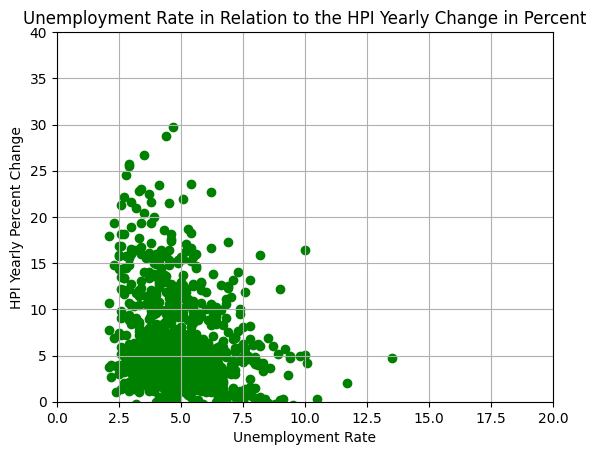

In [172]:
## ScatterPlot
# Used to discover correlations between values

plt.scatter(Final_Project_File['Unemployment Rate'], Final_Project_File['HPI Yearly Percent Change'], color='green')
plt.xlim(0,20)
plt.ylim(0,40)
plt.title('Unemployment Rate in Relation to the HPI Yearly Change in Percent')
plt.xlabel('Unemployment Rate')
plt.ylabel('HPI Yearly Percent Change')
plt.grid()
plt.show()

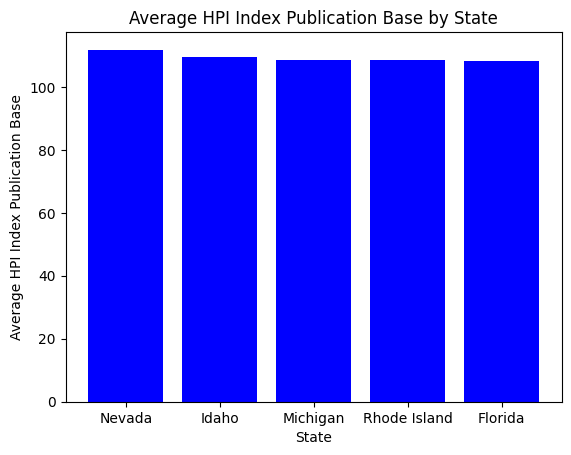

In [173]:
## Bar Chart
# Used to find the top 5 states by HPI Index Publication Base

State_Average = Final_Project_File.groupby('State')['HPI Index Publication Base'].mean()
Top_5 = State_Average.nlargest(5)

plt.bar(Top_5.index, Top_5.values, color = 'blue')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Average HPI Index Publication Base')
plt.title('Average HPI Index Publication Base by State')

plt.show()

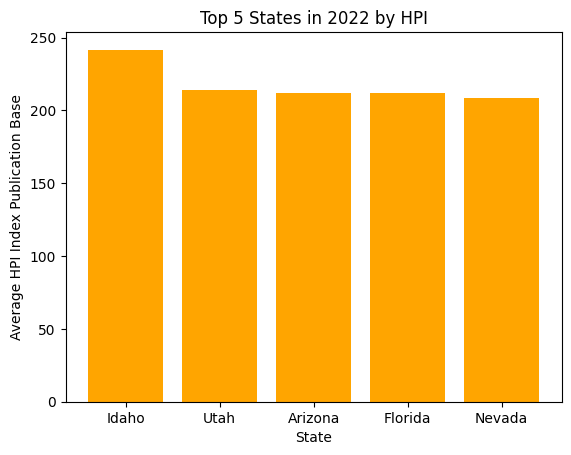

In [174]:
## Bar Chart 2
# Used to determine the top 5 states in 2022 by HPI

Year_2022 = Final_Project_File[Final_Project_File['Year'] == 2022]
State_Average_2022 = Year_2022.groupby('State')['HPI Index Publication Base'].mean()
Top_5 = State_Average_2022.nlargest(5)

plt.bar(Top_5.index, Top_5.values, color = 'orange')
plt.xlabel('State')
plt.ylabel('Average HPI Index Publication Base')
plt.title('Top 5 States in 2022 by HPI')

plt.show()